In [1]:
import numpy as np
import utils
import qiskit
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
provider = qiskit.IBMQ.load_account()

/home/user/.local/lib/python3.6/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


## 5 qubits linear

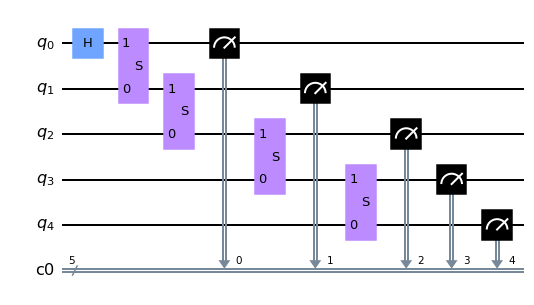

In [3]:
linear_interactions = {(i, i + 1): 1 for i in range(4)}
linear_circ = utils.linear_circuit(5, linear_interactions)
linear_circ.add_register(qiskit.ClassicalRegister(5))
linear_circ.measure(range(5), range(5))
linear_circ.draw('mpl')

### 8192 shots on lima and santiago qibm with 5 qubits

In [4]:
lima_result = utils.result_from_csv('measured_data/linear5_lima.csv')
santiago_result = utils.result_from_csv('measured_data/linear5_santiago.csv')

In [5]:
backend_sim = provider.get_backend('ibmq_qasm_simulator')
job_sim = qiskit.execute(linear_circ, backend_sim, shots=8192)
sim_result = job_sim.result().get_counts()

In [6]:
true_pd = utils.get_probs_distribution(5, linear_interactions)
true_result = {row['s']: row['Pr[s]'] for (ind, row) in true_pd.iterrows()}

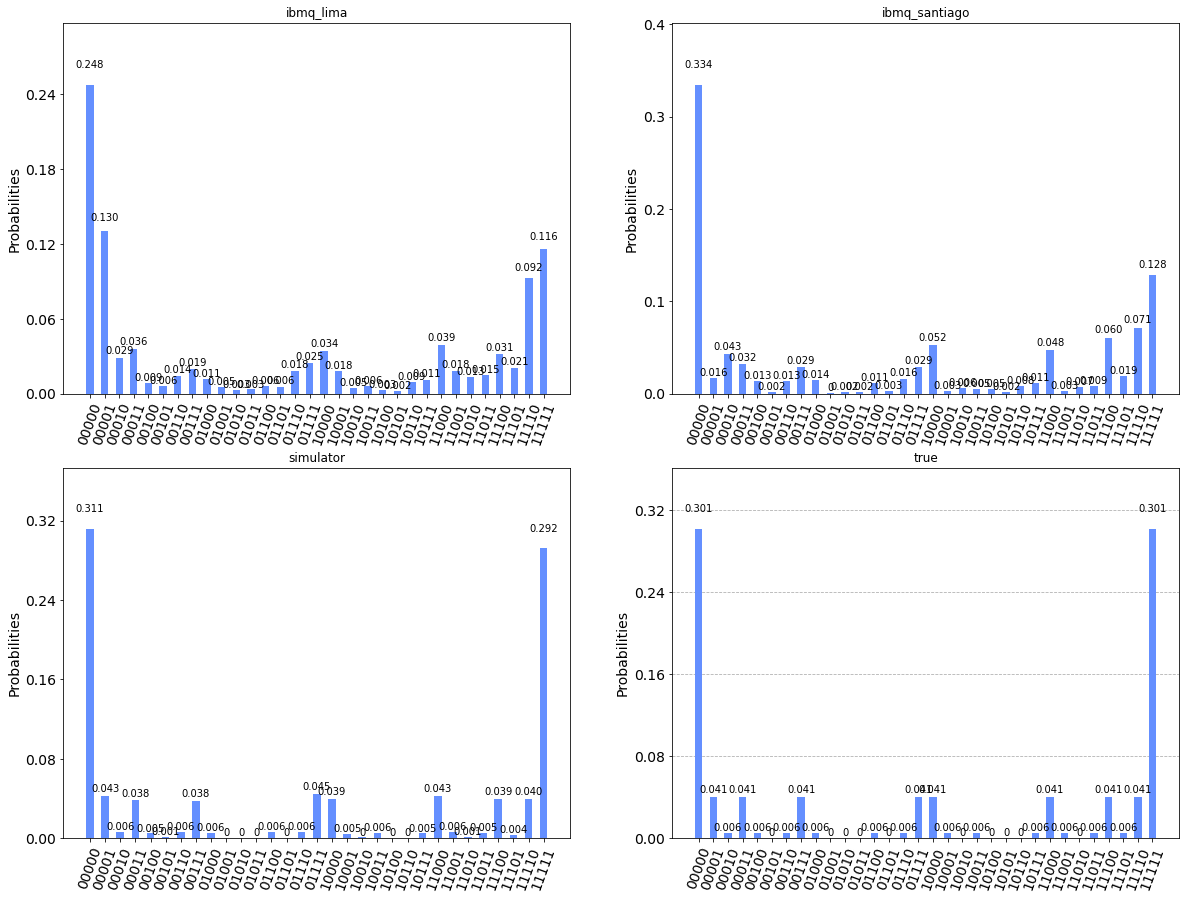

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.set_title('ibmq_lima')
ax2.set_title('ibmq_santiago')
ax3.set_title('simulator')
ax4.set_title('true')
fig.set_size_inches(20, 15)

qiskit.visualization.plot_histogram(lima_result, ax=ax1)
qiskit.visualization.plot_histogram(santiago_result, ax=ax2)
qiskit.visualization.plot_histogram(sim_result, ax=ax3)
qiskit.visualization.plot_histogram(true_result, ax=ax4)

In [10]:
utils.distribution_pseudo_pvalue(sim_result, linear_interactions)

0.5089042867449493

## 15 qubits linear

In [8]:
linear_interactions15 = {(i, i + 1): 1 for i in range(14)}
linear_circ15 = utils.linear_circuit(15, linear_interactions15)
linear_circ15.add_register(qiskit.ClassicalRegister(15))
linear_circ15.measure(range(15), range(15))

In [9]:
melbourne_result = utils.result_from_csv('measured_data/linear15_melbourne.csv')

In [14]:
utils.distribution_pseudo_pvalue(melbourne_result, linear_interactions15)

2.1563956773784485e-06

## 5 qubits circled

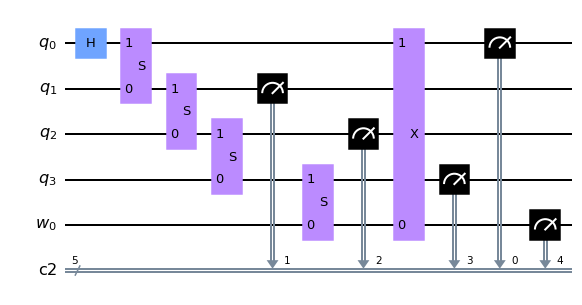

In [10]:
spins_n = 4
circled_interactions = {(i, (i + 1) % spins_n): 1 for i in range(spins_n)}
circled_circ = utils.circled_circuit(spins_n, circled_interactions)
circled_circ.add_register(qiskit.ClassicalRegister(spins_n + 1))
circled_circ.measure(range(spins_n + 1), range(spins_n + 1))
circled_circ.draw('mpl')

In [11]:
lima_result = utils.result_from_csv('measured_data/circled4_lima.csv')
lima_result = utils.process_circled_result(lima_result)
santiago_result = utils.result_from_csv('measured_data/circled4_santiago.csv')
santiago_result = utils.process_circled_result(santiago_result)

In [12]:
backend_sim = provider.get_backend('ibmq_qasm_simulator')
job_sim = qiskit.execute(circled_circ, backend_sim, shots=8192)
sim_result = job_sim.result().get_counts()

In [13]:
sim_result = utils.process_circled_result(sim_result)

In [14]:
true_pd = utils.get_probs_distribution(4, circled_interactions)
true_result = {row['s']: row['Pr[s]'] for (ind, row) in true_pd.iterrows()}

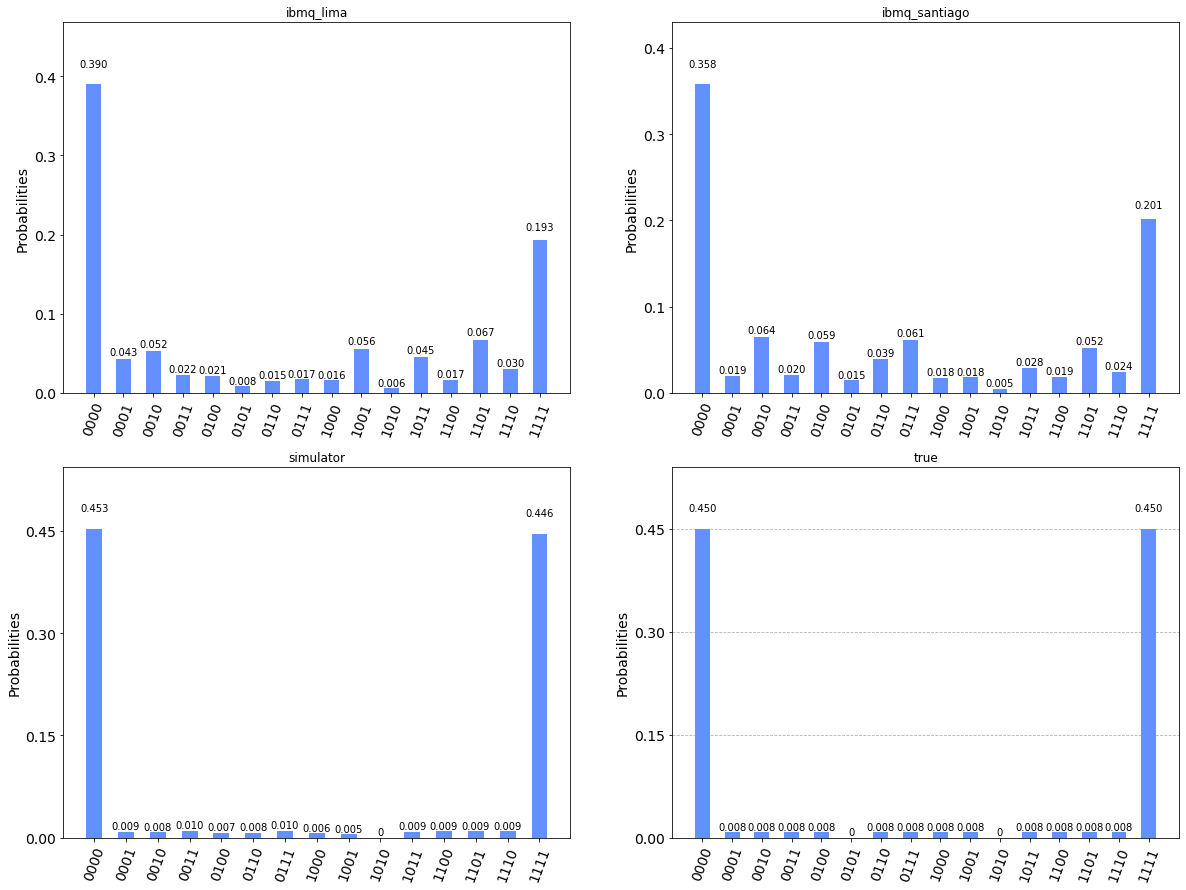

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.set_title('ibmq_lima')
ax2.set_title('ibmq_santiago')
ax3.set_title('simulator')
ax4.set_title('true')
fig.set_size_inches(20, 15)

qiskit.visualization.plot_histogram(lima_result, ax=ax1)
qiskit.visualization.plot_histogram(santiago_result, ax=ax2)
qiskit.visualization.plot_histogram(sim_result, ax=ax3)
qiskit.visualization.plot_histogram(true_result, ax=ax4)

## 15 qubits circled

In [3]:
spins_n = 14
circled_interactions14 = {(i, (i + 1) % spins_n): 1 for i in range(spins_n)}
circled_circ14 = utils.circled_circuit(spins_n, circled_interactions14)
circled_circ14.add_register(qiskit.ClassicalRegister(spins_n + 1))
circled_circ14.measure(range(spins_n + 1), range(spins_n + 1))

In [4]:
backend_sim = provider.get_backend('ibmq_16_melbourne')
job_sim = qiskit.execute(circled_circ14, backend_sim, shots=8192)